In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

project ="mcgillcapstone"
query = "select * from `firemandb.compiledfull` limit 100000"
df = pd.read_gbq(query,project_id=project,dialect='standard')

columns_to_parse = list(df.select_dtypes(include=['object']).columns)

for cparse in columns_to_parse:
  df[cparse] = pd.to_datetime(df[cparse])
  
for cparse in columns_to_parse:
  cday = 'day_{}'.format(cparse)
  cmonth = 'month_{}'.format(cparse)
  cyear = 'year_{}'.format(cparse)
  
  df[cday] = df[cparse].dt.day
  df[cmonth] = df[cparse].dt.month
  df[cyear] = df[cparse].dt.year
  
df = df.drop(['EventDate','DateRange'],axis=1)
  

y = df['IncendieBatiment_TrueFalse']
x = df.drop(['IncendieBatiment_TrueFalse'], axis=1)

X_train , X_test,y_train, y_test = train_test_split( 
            x, y , test_size=0.33, random_state= 42 )



Requesting query... ok.
Job ID: 734528e2-d0da-4fe9-a66e-a0cf3c75187f
Query running...
Query done.
Cache hit.

Retrieving results...


In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

clf = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=2, min_samples_leaf=3 )


clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

# # confusion matrix
matrix = confusion_matrix(y_test,y_pred)
dataframe = pd.DataFrame(matrix,index=['yes','no'], columns=['yes','no'])

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


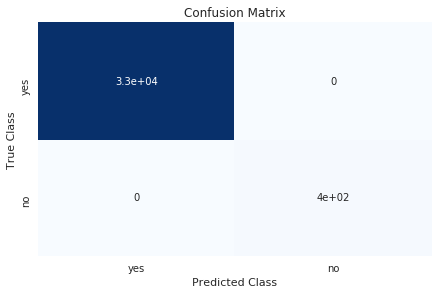

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [14]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 1.00


In [6]:
print("current accuracy score:{}".format( accuracy_score(y_test,y_pred)*100))

current accuracy score:100.0


In [ ]:
#!gsutil cp compiledfullfixed.csv gs://projectcsv/compiledfullfixed.parquet.gzip
!gsutil cp ProjectML.ipynb gs://projectcsv/ProjectML.ipynb